In [11]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.family':'Times New Roman', 
    'font.size': 14,  # 字体大小
    'axes.titlesize': 16,  # 轴标题的字体大小
    'axes.labelsize': 14,  # 轴标签的字体大小
    'xtick.labelsize': 12,  # x轴刻度的字体大小
    'ytick.labelsize': 12,  # y轴刻度的字体大小
    'legend.fontsize': 14,  # 图例的字体大小
})
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split 

import warnings
warnings.filterwarnings("ignore")

# 1. Load Data

## I. Coal mine A

In [12]:
list_A = []
id_A = []

In [13]:
def read_data_A(num):  
    """  
    读取指定编号的煤矿A原始数据文件并存储到列表中。  

    参数:  
    - num: 数据文件的编号，用于构建文件名并标识数据来源。  

    输入：包含指定编号数据文件的路径。  
    输出：将读取的数据存储到全局列表list_A中，并将编号存储到id_A中。  
    """  
    data = pd.read_csv(  
        f'origin data/22-3 coal mine A hp{num}.csv',   
        usecols=[0, 1, 2],   
        names=['tunnel1', 'tunnel2', 'time'],  
        skiprows=1  
    )  
    data = data.set_index("time")  
    data.index = pd.to_datetime(data.index)  

    list_A.append(data)  
    id_A.append(num)  

def show_data(data, name):  
    """  
    用Matplotlib生成和展示煤矿液压支架压力数据的图像，并保存为SVG格式。  

    参数:  
    - data: Pandas DataFrame，包含用于绘制图表的煤矿数据。  
    - name: 表示煤矿编号，用于图标题和文件保存命名。  

    输入：煤矿数据的Pandas DataFrame和煤矿的名称或编号。  
    输出：显示数据的时序图像，保存为SVG格式，并输出数据的信息到控制台。  
    """  
    fig, ax = plt.subplots(figsize=(8, 5))  
    # 使用对比度较大的颜色组合  
    colors = ['#FF6B6B', '#4ECDC4']  # 红色和青色的组合  
    data.plot(ax=ax, color=colors)  
    ax.set_xlabel('Time')  
    ax.set_ylabel('Pressure (MPa)')  
    ax.set_title(f'Coal Mine {name}# Hydraulic Support Pressure Data')  
    ax.legend(loc='upper right')  
    plt.savefig(f'{name}.svg', format='svg', bbox_inches='tight')  
    plt.show()  
    print(data.info())

In [14]:
read_data_A(30)

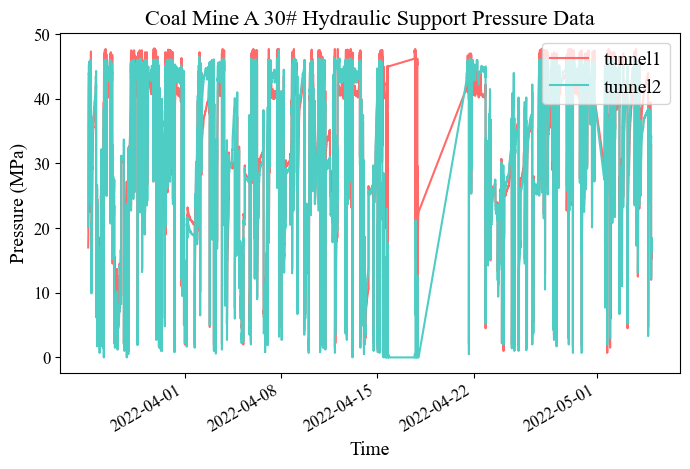

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65535 entries, 2022-03-25 00:02:04 to 2022-05-04 22:54:28
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tunnel1  65535 non-null  float64
 1   tunnel2  65535 non-null  float64
dtypes: float64(2)
memory usage: 1.5 MB
None


In [15]:
show_data(list_A[0], 'A 30')

In [16]:
read_data_A(35)

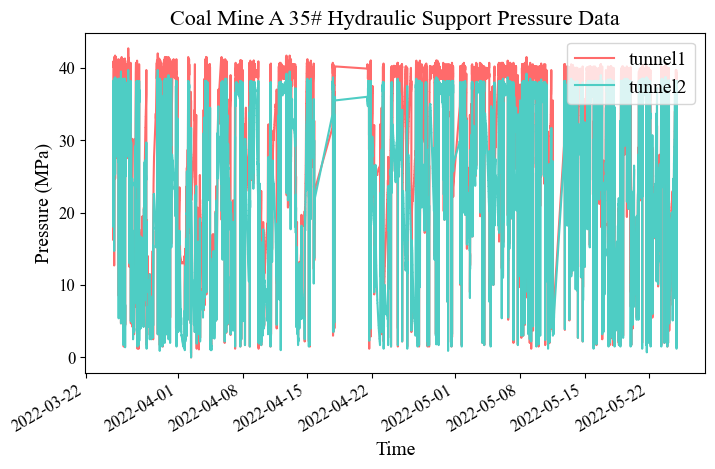

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118834 entries, 2022-03-25 00:02:04 to 2022-05-24 23:59:57
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   tunnel1  118834 non-null  float64
 1   tunnel2  118834 non-null  float64
dtypes: float64(2)
memory usage: 2.7 MB
None


In [17]:
show_data(list_A[1], 'A 35')

In [18]:
read_data_A(40)

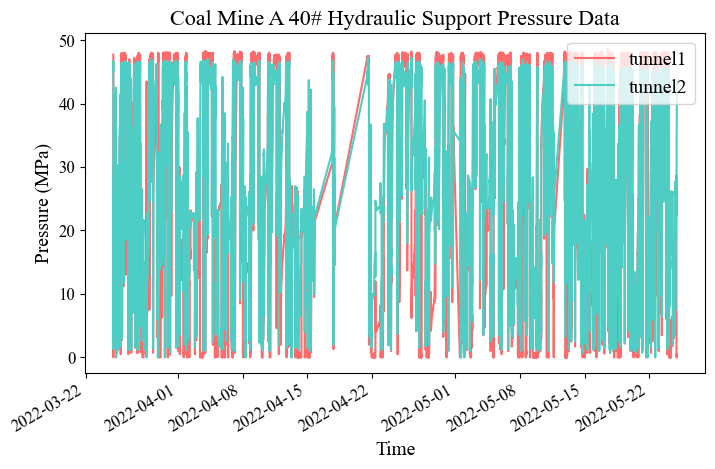

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118819 entries, 2022-03-25 00:02:04 to 2022-05-24 23:59:57
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   tunnel1  118819 non-null  float64
 1   tunnel2  118819 non-null  float64
dtypes: float64(2)
memory usage: 2.7 MB
None


In [19]:
show_data(list_A[2], 'A 40')

In [20]:
read_data_A(55)

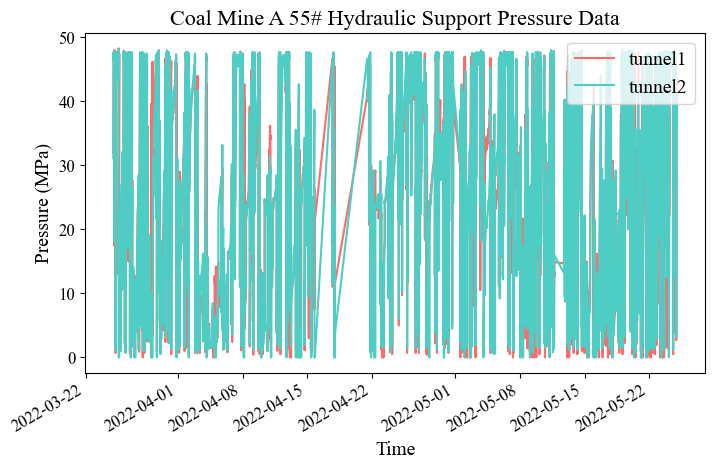

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118830 entries, 2022-03-25 00:02:04 to 2022-05-24 23:59:57
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   tunnel1  118830 non-null  float64
 1   tunnel2  118830 non-null  float64
dtypes: float64(2)
memory usage: 2.7 MB
None


In [21]:
show_data(list_A[3], 'A 55')

In [22]:
read_data_A(75)

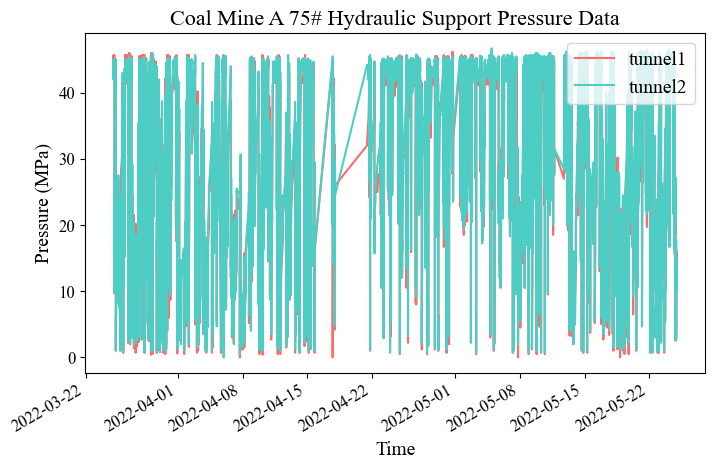

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118806 entries, 2022-03-25 00:02:04 to 2022-05-24 23:59:57
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   tunnel1  118806 non-null  float64
 1   tunnel2  118806 non-null  float64
dtypes: float64(2)
memory usage: 2.7 MB
None


In [23]:
show_data(list_A[4], 'A 75')

In [24]:
read_data_A(90)

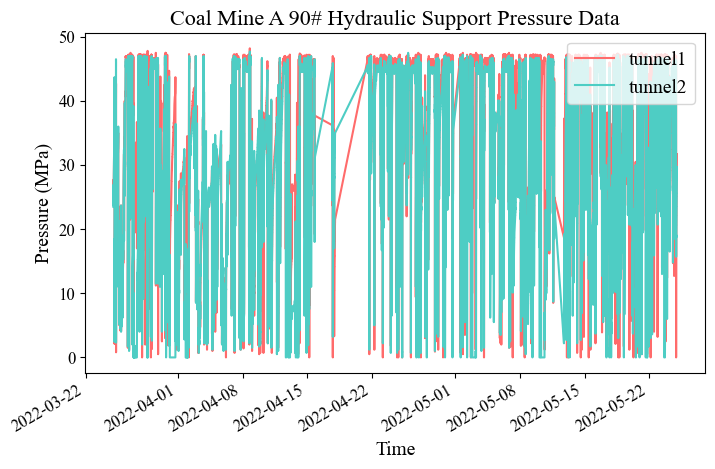

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118809 entries, 2022-03-25 00:02:04 to 2022-05-24 23:59:57
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   tunnel1  118809 non-null  float64
 1   tunnel2  118809 non-null  float64
dtypes: float64(2)
memory usage: 2.7 MB
None


In [25]:
show_data(list_A[5], 'A 90')

## II. Coal mine B

In [26]:
list_B = []
id_B = []
def read_data_B(num):
    data = pd.read_csv(
        f'origin data/22-4 coal mine B hp{num}.csv', 
        usecols=[0, 1, 2], 
        names=['time', 'tunnel1', 'tunnel2'],
        skiprows=1
        )
    
    data = data.set_index("time")

    # 转换索引为日期时间格式 
    data.index = pd.to_datetime(data.index)
    
    list_B.append(data)
    id_B.append(num)

In [27]:
read_data_B(1)

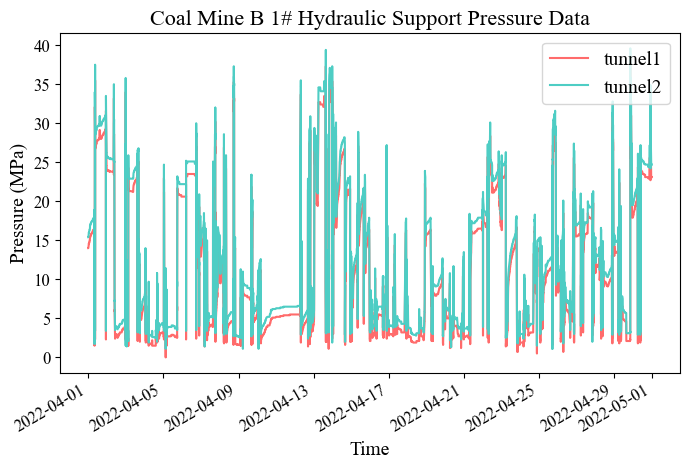

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29528 entries, 2022-04-30 23:45:00 to 2022-04-01 00:04:00
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tunnel1  29528 non-null  float64
 1   tunnel2  29528 non-null  float64
dtypes: float64(2)
memory usage: 692.1 KB
None


In [28]:
show_data(list_B[-1], 'B 1')

In [29]:
read_data_B(5)

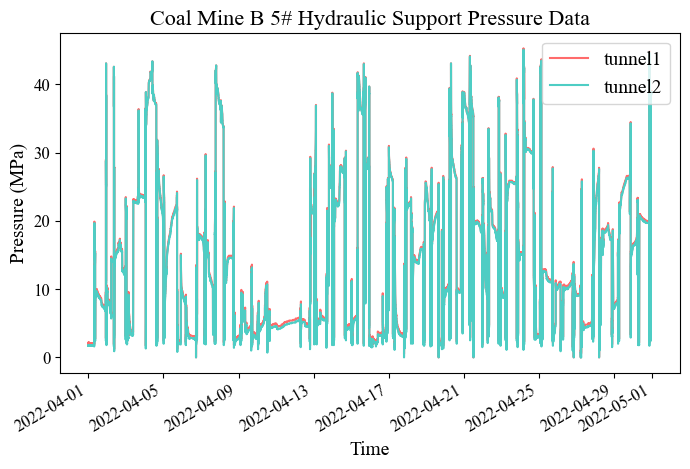

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53159 entries, 2022-04-30 23:59:22 to 2022-04-01 00:00:58
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tunnel1  53159 non-null  float64
 1   tunnel2  53159 non-null  float64
dtypes: float64(2)
memory usage: 1.2 MB
None


In [30]:
show_data(list_B[-1], 'B 5')


In [31]:
read_data_B(9)

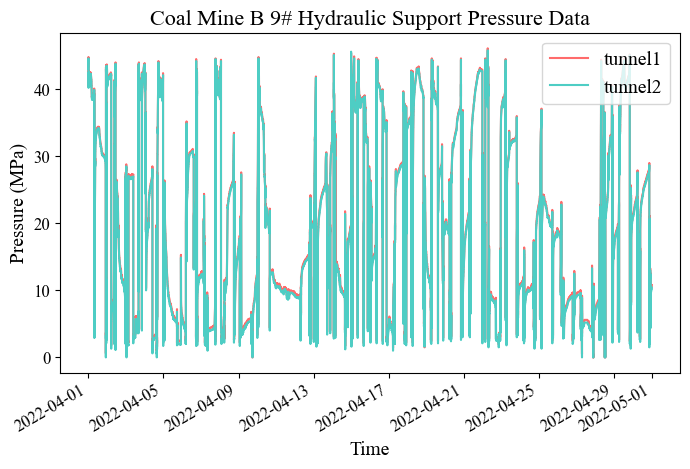

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49962 entries, 2022-04-30 23:53:06 to 2022-04-01 00:00:17
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tunnel1  49962 non-null  float64
 1   tunnel2  49962 non-null  float64
dtypes: float64(2)
memory usage: 1.1 MB
None


In [32]:
show_data(list_B[-1], 'B 9')


In [33]:
read_data_B(15)

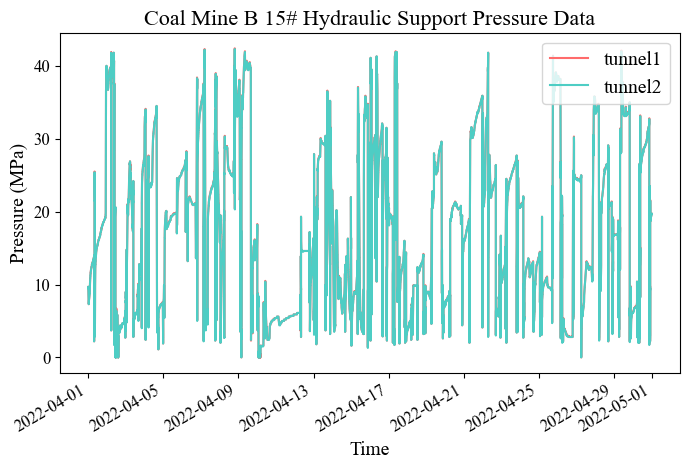

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36539 entries, 2022-04-30 23:52:45 to 2022-04-01 00:04:39
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tunnel1  36539 non-null  float64
 1   tunnel2  36539 non-null  float64
dtypes: float64(2)
memory usage: 856.4 KB
None


In [34]:
show_data(list_B[-1], 'B 15')


In [35]:
read_data_B(20)

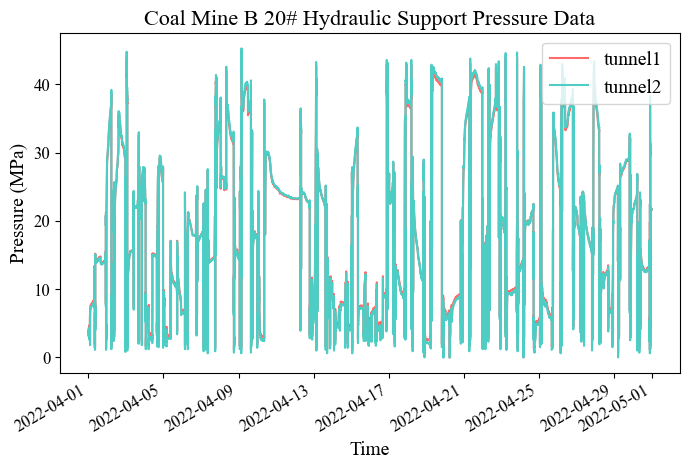

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53803 entries, 2022-04-30 23:46:30 to 2022-04-01 00:00:24
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tunnel1  53803 non-null  float64
 1   tunnel2  53803 non-null  float64
dtypes: float64(2)
memory usage: 1.2 MB
None


In [36]:
show_data(list_B[-1], 'B 20')


In [37]:
read_data_B(25)

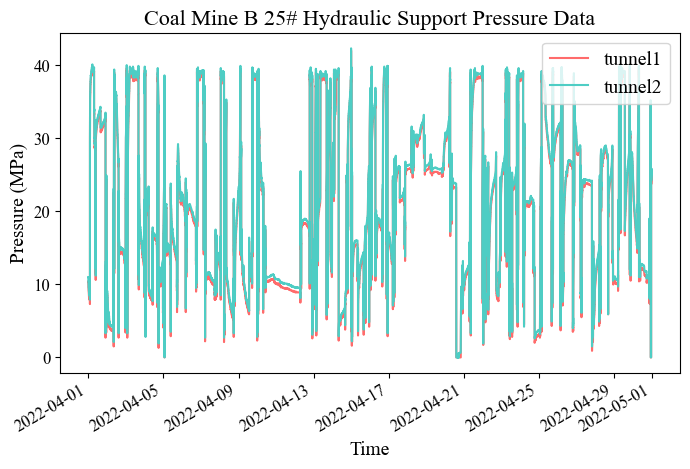

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51154 entries, 2022-04-30 23:45:54 to 2022-04-01 00:00:54
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tunnel1  51154 non-null  float64
 1   tunnel2  51154 non-null  float64
dtypes: float64(2)
memory usage: 1.2 MB
None


In [38]:
show_data(list_B[-1], 'B 25')


In [39]:
read_data_B(30)

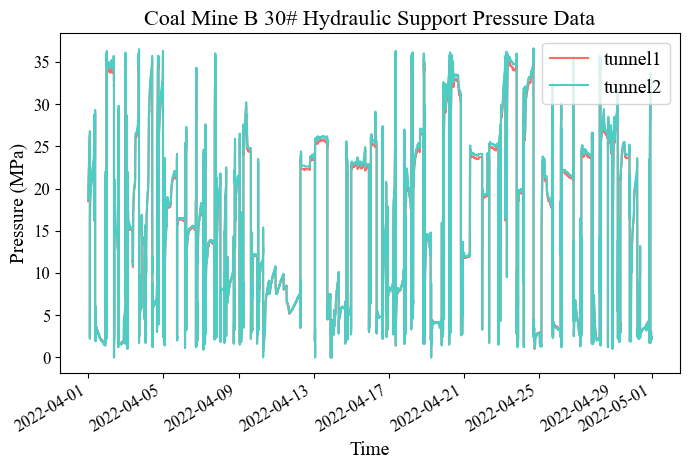

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51296 entries, 2022-04-30 23:52:17 to 2022-04-01 00:00:09
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tunnel1  51296 non-null  float64
 1   tunnel2  51296 non-null  float64
dtypes: float64(2)
memory usage: 1.2 MB
None


In [40]:
show_data(list_B[-1], 'B 30')


In [41]:
read_data_B(35)

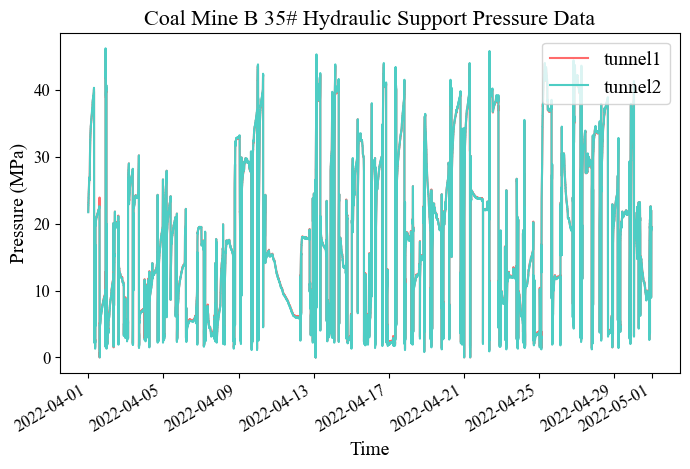

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52669 entries, 2022-04-30 23:52:53 to 2022-04-01 00:00:17
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tunnel1  52669 non-null  float64
 1   tunnel2  52669 non-null  float64
dtypes: float64(2)
memory usage: 1.2 MB
None


In [42]:
show_data(list_B[-1], 'B 35')


# 2. Preprocess

## 2.1 重采样、填充缺失值并合并通道

In [89]:
def resample_and_average(dataframes_list, resample_freq='5T'):
    """
    对传入的DataFrame列表中的每个DataFrame进行重采样，并返回一个仅含一列（两列均值）的DataFrame列表。
    
    参数：
    dataframes_list (list): 包含多个DataFrame的列表，每个DataFrame的index是时间。
    resample_freq (str): 重采样的频率，默认是'5T'（5分钟）。
    
    返回：
    list: 重采样并计算两列均值后的DataFrame列表，每个DataFrame只有一列。
    """
    resampled_list = []
    for df in dataframes_list:
        # 确保index为时间类型
        if not pd.api.types.is_datetime64_any_dtype(df.index):
            df.index = pd.to_datetime(df.index)
        
        # 对两列分别重采样，然后计算重采样后的均值
        resampled_df = df.resample(resample_freq).mean()
        resampled_df['average'] = resampled_df.mean(axis=1)  # 计算每行的均值
        
        # 填充缺失值
        resampled_df = resampled_df.interpolate(method='time')

        resampled_list.append(resampled_df)
    
    return resampled_list

In [90]:
resam_list_A = resample_and_average(list_A)

In [91]:
resam_list_B = resample_and_average(list_B)

In [92]:
# 创建线图
title = '90# Coal Mining Hydraulic Support'
fig = px.line(resam_list_B[4], y=['tunnel1', 'tunnel2'], title=title)

# 更新布局和样式
fig.update_layout(
    template='plotly_white',  # 使用白色背景的模板
    title={'text': title, 'x':0.5, 'xanchor': 'center'},  # 居中标题
    xaxis_title="Time",
    yaxis_title="Value",
    legend_title="Tunnel",
    font=dict(
        family="Times New Roman, Times, serif",  # 更改字体为更适合学术的
        size=12,
        color="Black"
    )
)

# 设置图例位置
fig.update_layout(legend=dict(
    x=1.01,
    y=1.01,
    bordercolor="Black",
    borderwidth=1
))

# 调整图形尺寸（根据需要调整或删除这一行）
fig.update_layout(width=800, height=400)

# 显示图表
fig.show()

## 2.2 清理异常数据并转换为ndarray

In [93]:
# 删除数据集A中每个DataFrame中4月15日到4月22日的数据
processed_df_list_A = []
for df in resam_list_A:   
    df = df[~((df.index.month == 4) & (df.index.day >= 15) & (df.index.day <= 22))]
    
    processed_df_list_A.append(df)

# 2. 将每个处理后的DataFrame转换为ndarray
ndarray_list_A = [df['average'].to_numpy() for df in processed_df_list_A]

ndarray_list_B = [df['average'].to_numpy() for df in resam_list_B]

In [94]:
px.line(ndarray_list_B[3])

In [95]:
# Function to perform min-max normalization on a numpy array
def min_max_normalize(arr):
    return (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

def split_normal(ndarray_list):
    # Lists to store the divided parts
    first_part = []
    second_part = []
    third_part = []
    # 划分数据集
    for arr in ndarray_list:
        n = len(arr)
        first_part.append(arr[:int(n * 0.6)])
        second_part.append(arr[int(n * 0.6):int(n * 0.8)])
        third_part.append(arr[int(n * 0.8):])

    # Applying min-max normalization to each part
    train = [min_max_normalize(arr) for arr in first_part]
    valid = [min_max_normalize(arr) for arr in second_part]
    test = [min_max_normalize(arr) for arr in third_part]

    return train, valid, test

In [96]:
train_A, valid_A, test_A = split_normal(ndarray_list_A)

In [97]:
train_A[1].shape, valid_A[1].shape, test_A[1].shape

((9158,), (3053,), (3053,))

In [98]:
train_B, valid_B, test_B = split_normal(ndarray_list_B)

In [99]:
train_B[1].shape, valid_B[1].shape, test_B[1].shape

((5184,), (1728,), (1728,))

# 3.生成数据集

In [100]:
def generate_subsequences(data_list, sub_length=288, ratio=0.5):
    """
    根据给定的包含多个一维数组的 list 生成子序列。

    参数：
    - data_list (list): 包含多个一维数组的 list。
    - sub_length (int): 每个子序列的长度，默认为 288。
    - ratio (float): 子序列之间的重叠比例，默认为 0.5，表示每个子序列与前一个子序列有 50% 的重叠。

    返回：
    - np.array: 包含所有生成子序列的二维 Numpy 数组。
    """
    # 存储所有子序列的列表
    all_subsequences = []

    # 对每个一维数组生成子序列
    for time_series in data_list:
        step = int(sub_length * (1 - ratio))
        num_subsequences = (len(time_series) - sub_length) // step + 1

        # 遍历每个一维数组中的子序列
        for i in range(int(num_subsequences)):
            start_index = int(i * step)
            end_index = start_index + sub_length
            
            # 如果结束索引超出时间序列长度，结束循环
            if end_index > len(time_series):
                break
            
            subsequence = time_series[start_index:end_index]
            all_subsequences.append(subsequence)
    
    # 将所有子序列转换为二维 Numpy 数组并返回
    return np.array(all_subsequences)

In [101]:
# 测试是否可以按照预期生成数据集
train_B_dataset = generate_subsequences(train_B, ratio=0.75)
train_B_dataset.shape

(545, 288)

In [102]:
# 测试是否可以按照预期生成数据集
train_A_dataset = generate_subsequences(train_A, ratio=0.75)
train_A_dataset.shape

(696, 288)

# 4. Download Data

In [103]:
# import pickle

# # 保存到本地
# def save_to_file(data, filename):
#     with open(filename, 'wb') as f:
#         pickle.dump(data, f)

# # 创建文件路径和数据的字典
# datasets = {
#     'dataset/train_A.pkl': train_A,
#     'dataset/valid_A.pkl': valid_A,
#     'dataset/test_A.pkl': test_A,
#     'dataset/train_B.pkl': train_B,
#     'dataset/valid_B.pkl': valid_B,
#     'dataset/test_B.pkl': test_B
# }

# # 循环保存所有数据集
# for filename, data in datasets.items():
#     save_to_file(data, filename)